# Modern generative models (recap)


## Generative adversarial networks

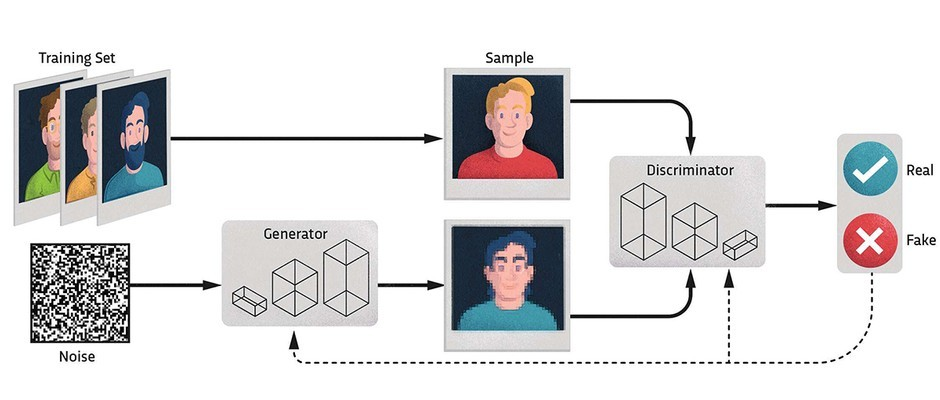

source: [link](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.linkedin.com%2Fpulse%2Fexploring-fascinating-realm-generative-adversarial-networks-kaurav&psig=AOvVaw2iz_M7KExYVDWnTkC1F0K3&ust=1761211007545000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCNj-kbW8t5ADFQAAAAAdAAAAABAV)

Paper link: [arxiv.org](https://arxiv.org/abs/1406.2661)

Training algorithm:

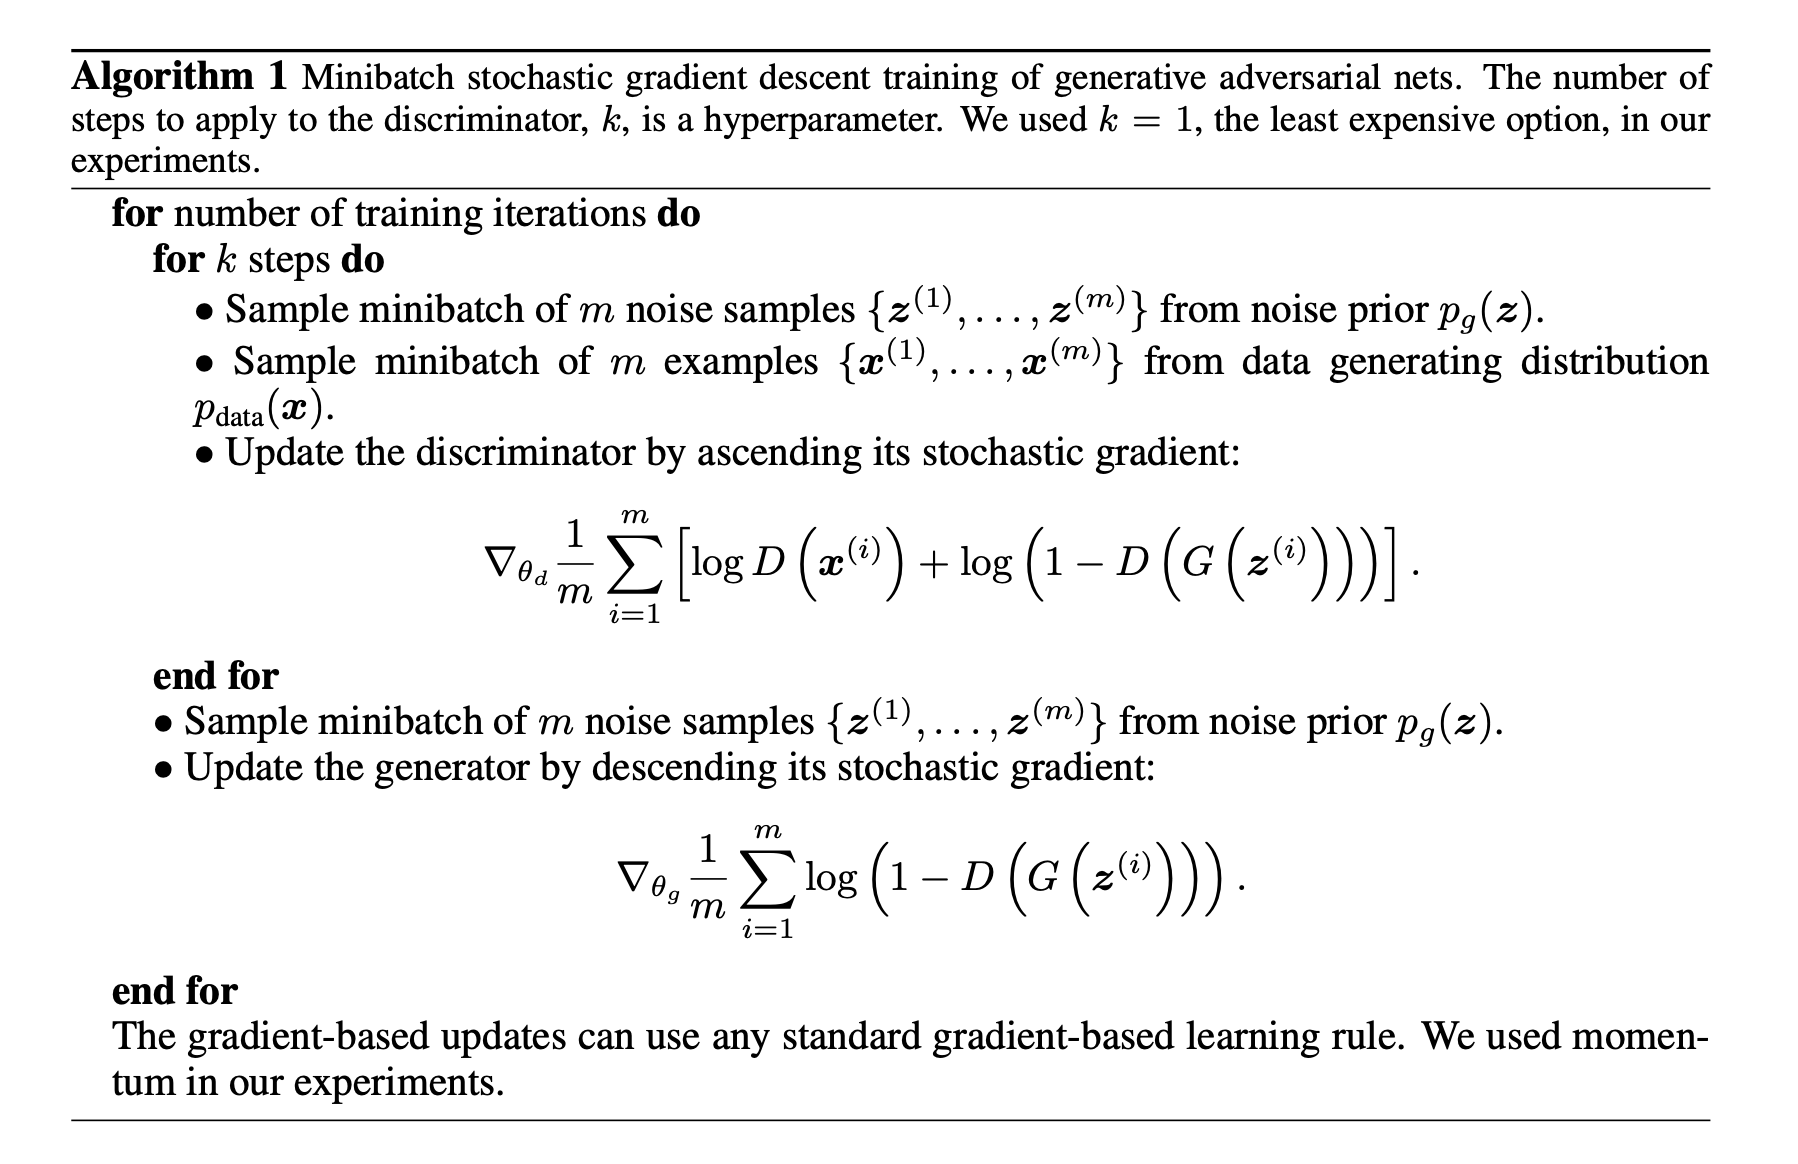

## Variational AutoEncoders

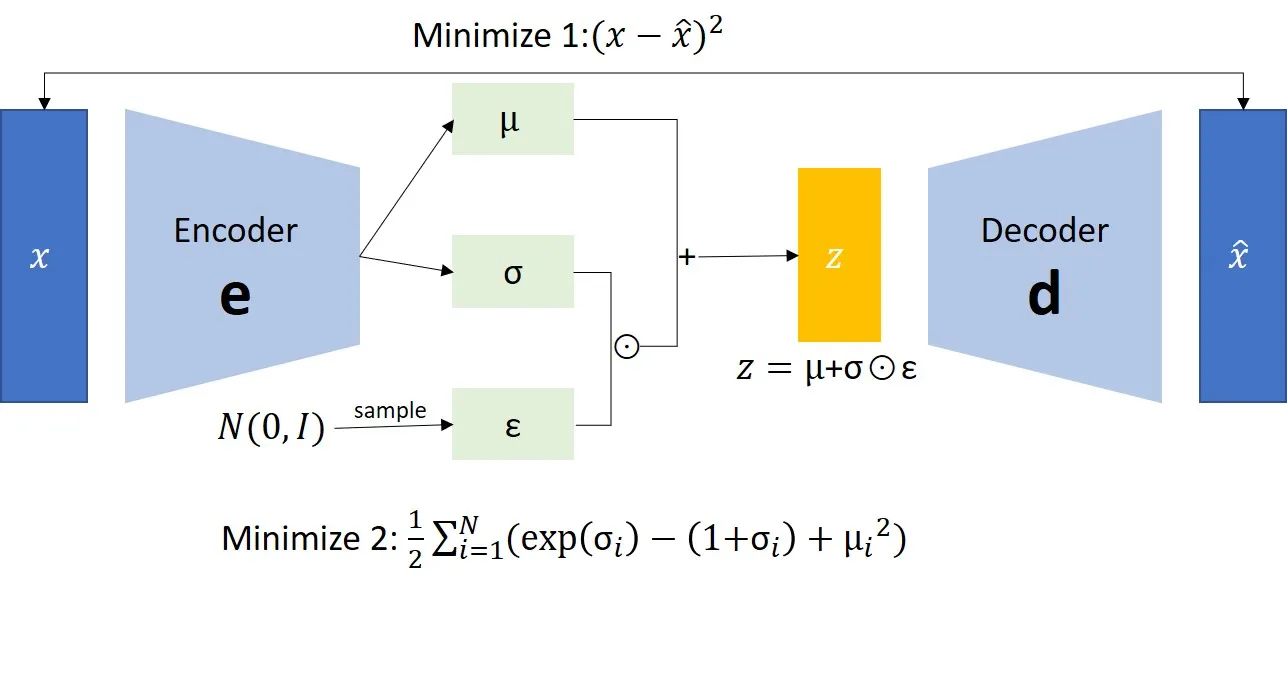

Source: [link](https://medium.com/geekculture/variational-autoencoder-vae-9b8ce5475f68)


Paper link: [arxiv.org](https://arxiv.org/abs/1312.6114)

## Denoising Diffusion Probabilistic Models

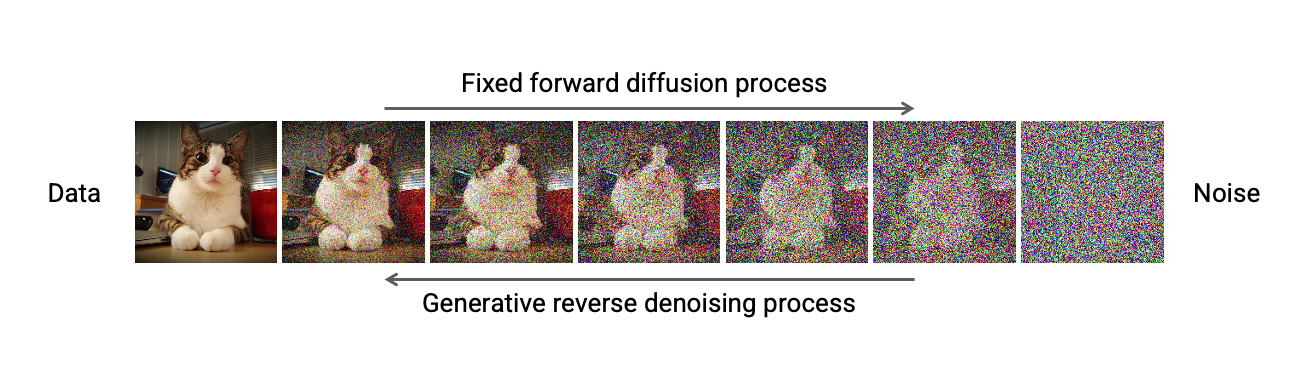

source: [link](https://cvpr2022-tutorial-diffusion-models.github.io/img/diffusion.png)

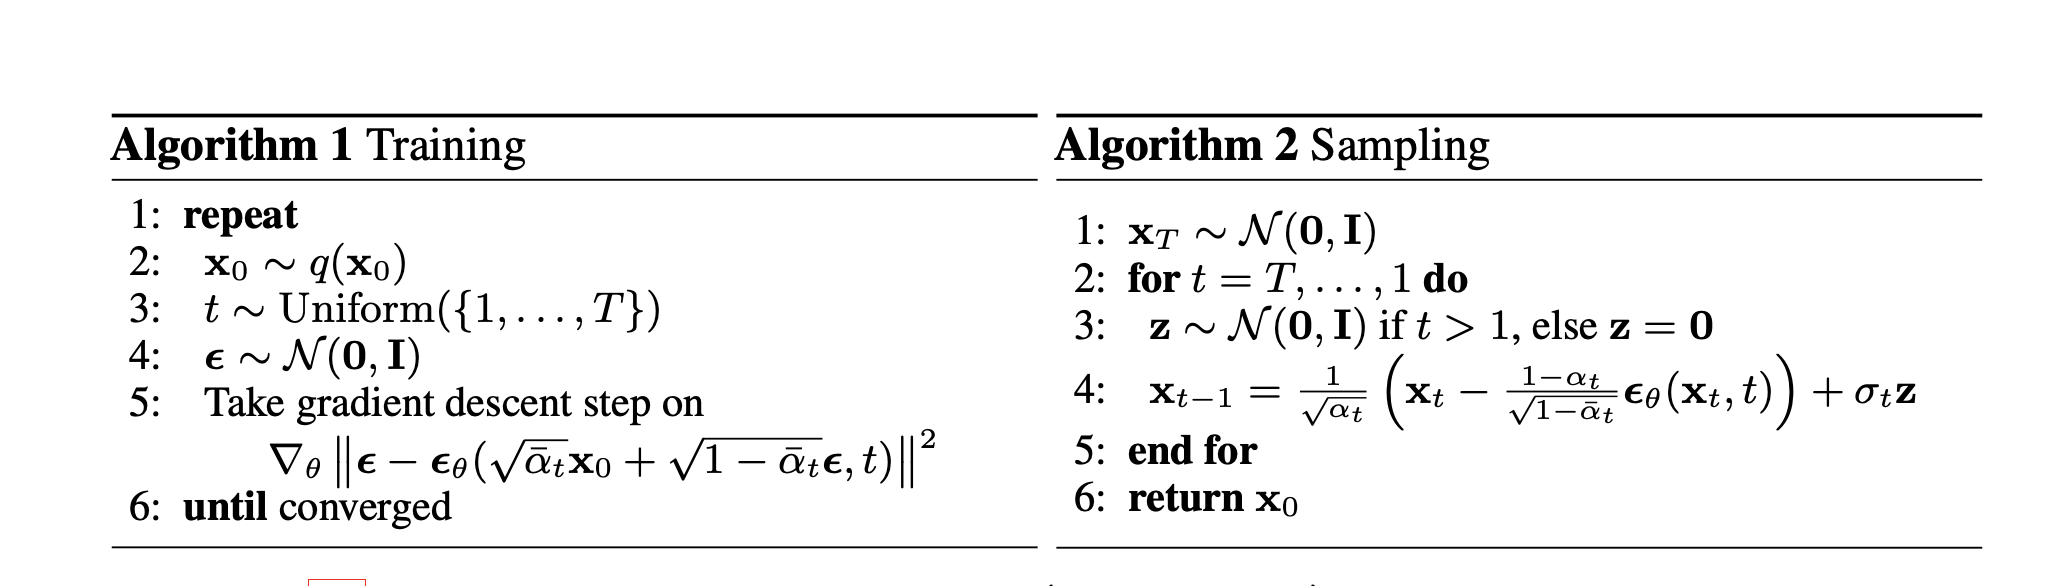

Paper link: [arxiv](https://arxiv.org/abs/2006.11239)

# Use case: GAN for oil reservoir permeability maps

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from tqdm import tqdm
from IPython.display import clear_output, display

DEVICE = 'cuda'

In [ ]:
class Generator1(nn.Module):
    def __init__(self, nz=100, ngf=64, nc=1):
        super(Generator1, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 16,
                               4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.ReLU(True),
            # state size. (ngf*16) x 4 x 4
            nn.ConvTranspose2d(ngf * 16, ngf * 8,
                               4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 8 x 8
            nn.ConvTranspose2d(ngf * 8, ngf * 4,
                               4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 16 x 16
            nn.ConvTranspose2d(ngf * 4, ngf * 2,
                               4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 32 x 32
            nn.ConvTranspose2d(ngf * 2, ngf * 2,
                               4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 64 x 64
            nn.ConvTranspose2d(ngf * 2, ngf,
                               4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 128 x 128
            nn.ConvTranspose2d(ngf, nc,
                               4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 256 x 256
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
class Discriminator1(nn.Module):
    def __init__(self):
        super(Discriminator1, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 256 x 256
            nn.Conv2d(1, 16,
                      4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (16) x 128 x 128
            nn.Conv2d(16, 16,
                      4, stride=2, padding=1, bias=False),
            nn.InstanceNorm2d(16),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (16) x 64 x 64
            nn.Conv2d(16, 16 * 2,
                      4, stride=2, padding=1, bias=False),
            nn.InstanceNorm2d(16 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (16*2) x 32 x 32
            nn.Conv2d(16 * 2, 16 * 4,
                      4, stride=2, padding=1, bias=False),
            nn.InstanceNorm2d(16 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (16*4) x 16 x 16
            nn.Conv2d(16 * 4, 16 * 8,
                      4, stride=2, padding=1, bias=False),
            nn.InstanceNorm2d(16 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (16*8) x 8 x 8
            nn.Conv2d(16 * 8, 16 * 16,
                      4, stride=2, padding=1, bias=False),
            nn.InstanceNorm2d(16 * 16),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (16*16) x 4 x 4
            nn.Conv2d(16 * 16, 1,
                      4, stride=1, padding=0, bias=False),
            # state size. 1
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
netG = Generator1()

In [ ]:
netD = Discriminator1()

In [ ]:
netD.load_state_dict(
    torch.load('netD_120.pt', DEVICE)
)

<All keys matched successfully>

In [ ]:
netG.load_state_dict(
    torch.load('netG_120.pt', DEVICE)
)

<All keys matched successfully>

In [ ]:
netD.eval()

Discriminator1(
  (main): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(16, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (12): InstanceNorm2d(128, e

In [ ]:
netG.eval()

Generator1(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Batc

In [ ]:
def min_max_normal(tens, a=-1,b=1):
    k_max = tens.max().item()
    k_min = tens.min().item()
    return (b-a) * (tens - k_min) / (k_max - k_min) - b

In [ ]:
def min_max_unnormalize(normalized_tens, k_min, k_max, a=-1, b=1):
    return (normalized_tens+b)*(k_max-k_min)/(b-a)+k_min

In [ ]:
z = torch.randn(4, 100, 1, 1)

In [ ]:
generated_maps = min_max_unnormalize(
    netG(z).detach().cpu().squeeze().numpy(),
    k_min=0.10000000149011612,
    k_max=833.6722412109375
)

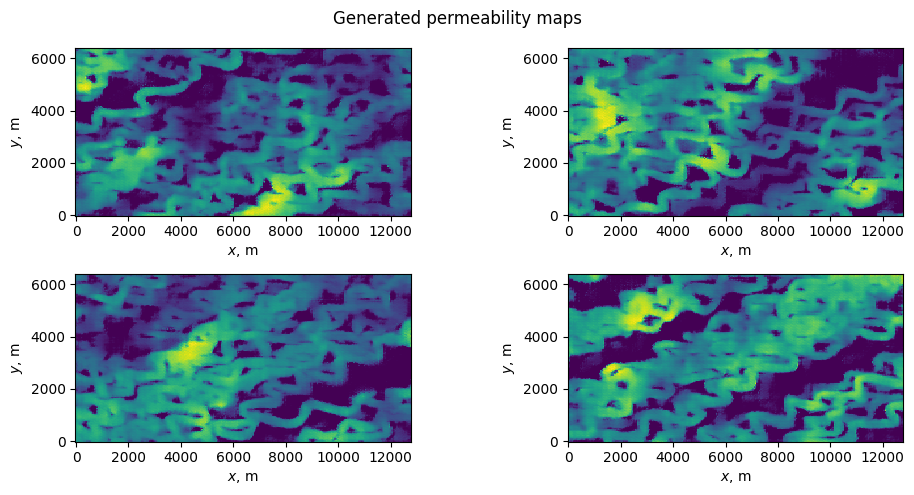

In [ ]:
X = np.arange(256) * 50
Y = np.arange(256) * 25

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

fig.suptitle('Generated permeability maps')
for i, ax in enumerate(axs.flatten()):
    ax.pcolormesh(X, Y, generated_maps[i])

    ax.set_aspect('equal')

    ax.set_xlabel(r'$x$, m')
    ax.set_ylabel(r'$y$, m')

fig.tight_layout()
fig.show()

# Well test interprentation

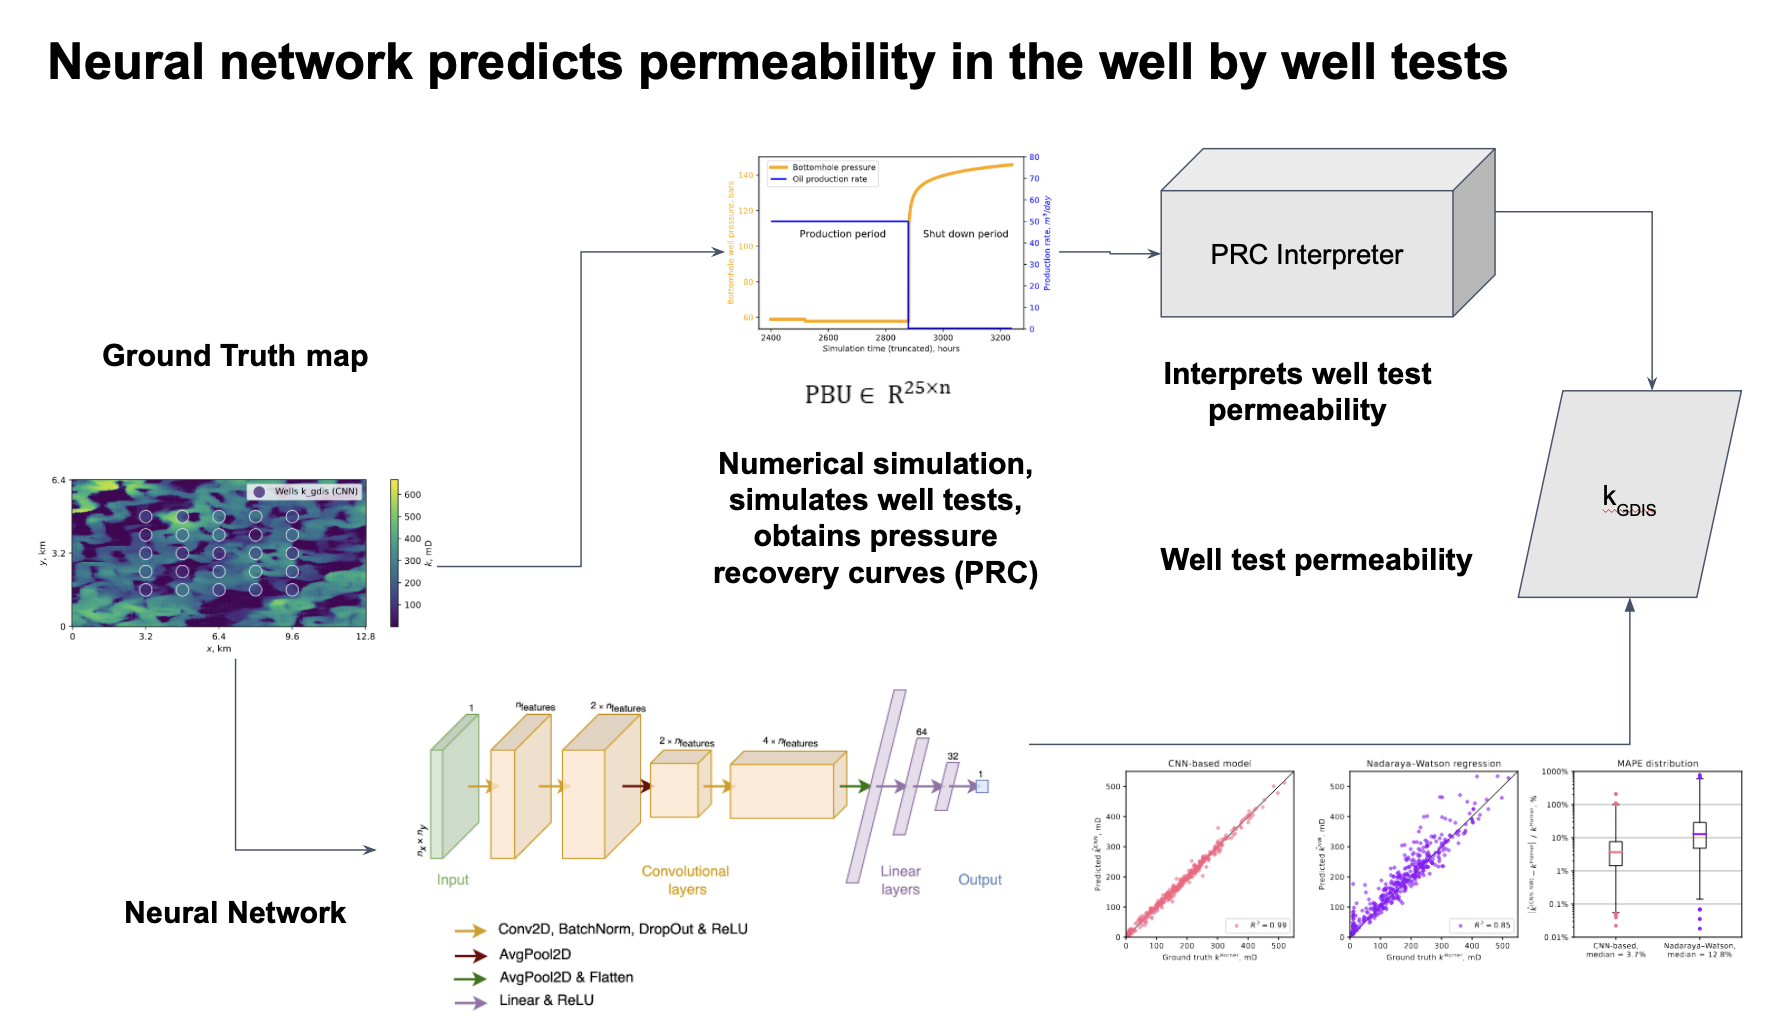

In [ ]:
class Horner_2(nn.Module):
    def __init__(self, x_y=32, dropout_prob=0.1, init_features=64):
        super(Horner_2, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, init_features, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(init_features),
            nn.Dropout(dropout_prob),
            nn.ReLU(),

            nn.Conv2d(init_features, init_features * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(init_features * 2),
            nn.Dropout(dropout_prob),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(init_features * 2, init_features * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(init_features * 2),
            nn.Dropout(dropout_prob),
            nn.ReLU(),

            nn.Conv2d(init_features * 2, init_features * 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(init_features * 4),
            nn.Dropout(dropout_prob),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )

        self.fc = nn.Sequential(
            nn.Linear(int(init_features * 4 * (x_y // 4 - 1) * (x_y // 4 - 1)), 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.conv(x)
        # print(f'Shape after convolution: {x.shape}')
        x = x.flatten(start_dim=1)
        # print(f'Shape after flatenning: {x.shape}')
        x = self.fc(x)
        return x

In [ ]:
well_test_cnn = Horner_2()

In [ ]:
well_test_cnn.load_state_dict(
    torch.load('horner_2_nn.pth', DEVICE)
)

<All keys matched successfully>

In [ ]:
well_test_cnn.eval()

Horner_2(
  (conv): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.1, inplace=False)
    (7): ReLU()
    (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.1, inplace=False)
    (12): ReLU()
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.1, inplace=False)
    (16): ReLU()
    (17): AvgPool2d(ker

# Ground truth map

In [ ]:
perm_map_gt = np.load('perm_map.npy').astype(np.float32)
perm_map_gt.shape

(256, 256)

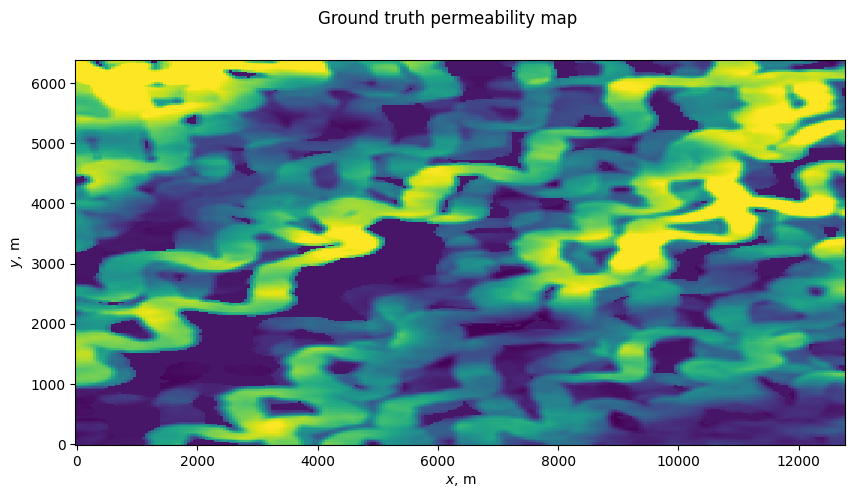

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

fig.suptitle('Ground truth permeability map')

ax.pcolormesh(X, Y, perm_map_gt, vmin=0, vmax=400)

ax.set_aspect('equal')

ax.set_xlabel(r'$x$, m')
ax.set_ylabel(r'$y$, m')

fig.show()

In [ ]:
well_tests = pd.read_csv('interpret_last_map.csv')

well_tests

well_name    x    y      k_gdis  high_quality
0         W1  128  128   97.839412          True
1         W2  128  160  269.447136          True
2         W3  128  192  293.847652          True
3         W4  128   64  140.569018          True
4         W5  128   96  194.724497          True
5         W6  160  128  168.148042          True
6         W7  160  160   16.977887         False
7         W8  160  192  279.836145          True
8         W9  160   64  194.554180          True
9        W10  160   96  288.828185          True
10       W11  192  128  105.487304          True
11       W12  192  160  228.283850          True
12       W13  192  192  152.085019          True
13       W14  192   64  115.816487          True
14       W15  192   96  182.636058          True
15       W16   64  128  131.056701          True
16       W17   64  160   48.217916         False
17       W18   64  192  112.537850         False
18       W19   64   64   63.288988         False
19       W20   64   96  229.017997          True
20       W21   96  128   77.445252         False
21       W22   96  160  221.881489          True
22       W23   96  192  164.567374          True
23       W24   96   64  228.811289          True
24       W25   96   96   51.682837         False

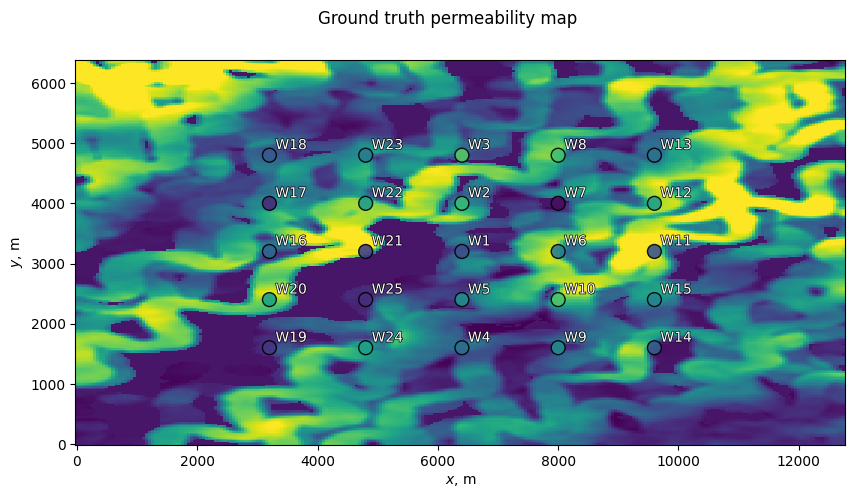

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

fig.suptitle('Ground truth permeability map')

ax.pcolormesh(X, Y, perm_map_gt, vmin=0, vmax=400)

ax.set_aspect('equal')

ax.set_xlabel(r'$x$, m')
ax.set_ylabel(r'$y$, m')

fig.show()

ax.scatter(well_tests['x'] * 50, well_tests['y'] * 25, c=well_tests['k_gdis'], vmin=0, vmax=400, s=100, edgecolors='k', alpha=0.9)

for idx, row in well_tests.iterrows():
    ax.annotate(
        xy=(row['x'] * 50 + 100, row['y'] * 25 + 100),
        text=row['well_name'],
        color='white',
        path_effects=[pe.withStroke(linewidth=1, foreground="k")]
)



In [ ]:
well_i = 4

well_tests.iloc[well_i]

well_name               W5
x                      128
y                       96
k_gdis          194.724497
high_quality          True
Name: 4, dtype: object

In [ ]:
perm_map_gt_slice = perm_map_gt[
    well_tests.iloc[well_i]['x'] - 16:well_tests.iloc[well_i]['x'] + 15,
    well_tests.iloc[well_i]['y'] - 16:well_tests.iloc[well_i]['y'] + 15,
]

perm_map_gt_slice.shape

(31, 31)

In [ ]:
well_test_cnn(
    torch.from_numpy(perm_map_gt_slice)[None, None, ...]
)

tensor([[184.5520]], grad_fn=<ReluBackward0>)

# Inverse problem: find the unknown permeability map

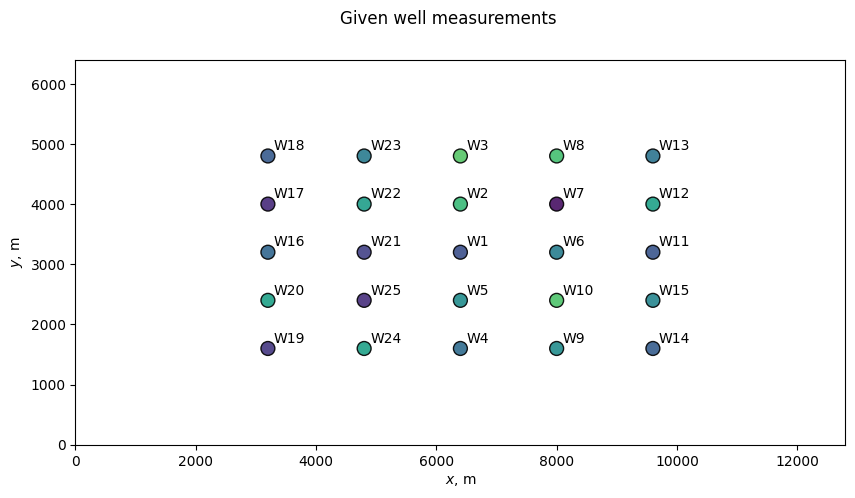

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

fig.suptitle('Given well measurements')

fig.show()

ax.scatter(well_tests['x'] * 50, well_tests['y'] * 25, c=well_tests['k_gdis'], vmin=0, vmax=400, s=100, edgecolors='k', alpha=0.9)

for idx, row in well_tests.iterrows():
    ax.annotate(
        xy=(row['x'] * 50 + 100, row['y'] * 25 + 100),
        text=row['well_name'],
        color='k',
)

ax.set_xlim(0, 12800)
ax.set_ylim(0, 6400)
ax.set_aspect('equal')

ax.set_xlabel(r'$x$, m')
ax.set_ylabel(r'$y$, m')

fig.show()

In [ ]:
def r2(real, pred, axis=0):
    mse = torch.mean(torch.square(real - pred), axis=axis)
    var = torch.var(real, axis=axis, correction=0)
    return 1.0 - mse / var

In [ ]:
class GDIS_Loss(nn.Module):

    def __init__(self, well_df, gdis_model, device, nx_=31, ny_=31, nx=256, ny=256):
        super().__init__()
        self.masks = torch.zeros(1, len(well_df), nx, ny).type(torch.bool)
        self.gdis_model = gdis_model.eval()
        for i, (_, row) in enumerate(well_df.iterrows()):
            i_min = row['x'] - nx_ // 2 - 1
            j_min = row['y'] - ny_ // 2 - 1
            i_max = i_min + nx_
            j_max = j_min + ny_
            self.masks[0, i, i_min:i_max, j_min:j_max] = True
        self.y_gt = torch.from_numpy(well_df['k_gdis'].values)[None]
        self.y_gt = self.y_gt.to(device)
        self.nx_ = nx_
        self.ny_ = ny_
        self.n_wells = self.masks.shape[1]

    def forward(self, X):
        batch_size = X.shape[0]
        masks = torch.tile(self.masks, (batch_size, 1, 1, 1))
        X_ = torch.tile(X.unsqueeze(1), (1, self.n_wells, 1, 1))[masks].view(
            batch_size*self.n_wells, 1, self.nx_, self.ny_
        )
        self.y_pred = self.gdis_model(X_).reshape(batch_size, self.n_wells)
        self.loss = torch.mean(torch.square(self.y_pred - self.y_gt), dim=1)
        return self.loss

    def r2(self):
        # y_gt = torch.tile(self.y_gt, (batch_size, 1))
        return r2(self.y_gt, self.y_pred, axis=1)


In [ ]:
loss_fn = GDIS_Loss(well_df=well_tests, gdis_model=well_test_cnn.to(DEVICE), device=DEVICE)

In [ ]:
loss_fn(
    torch.from_numpy(perm_map_gt)[None].to(DEVICE)
)

tensor([76.2887], device='cuda:0', dtype=torch.float64,
       grad_fn=<MeanBackward1>)

In [ ]:
z = torch.randn(4, 100, 1, 1, device=DEVICE)
netG = netG.to(DEVICE)

In [ ]:
generated_maps = min_max_unnormalize(
    netG(z).squeeze(),
    k_min=0.10000000149011612,
    k_max=833.6722412109375
)

In [ ]:
loss_fn(
    generated_maps
)

tensor([26646.6779, 26306.3110, 28770.5288, 18901.6814], device='cuda:0',
       dtype=torch.float64, grad_fn=<MeanBackward1>)

## Inverse problem training loop


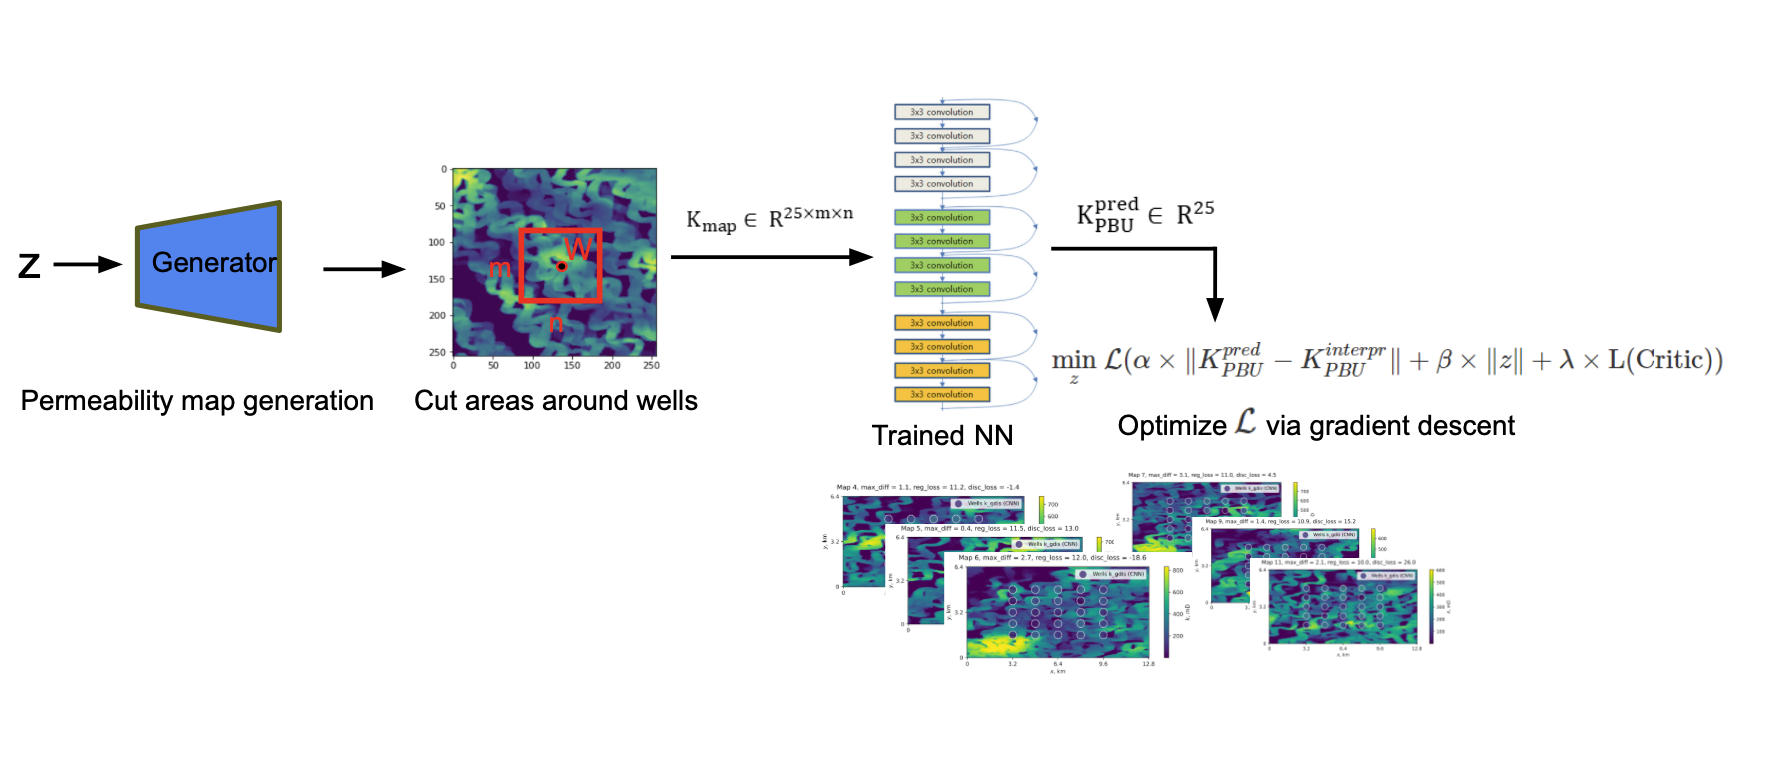

In [ ]:
DEVICE = 'cuda'
z = torch.randn(10, 100, 1, 1, device=DEVICE)
netG = netG.to(DEVICE)
well_test_cnn = well_test_cnn.to(DEVICE)
learning_rate = 1.0
optimizer = torch.optim.Adam([z], lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=20)
loss_fn = GDIS_Loss(well_df=well_tests, gdis_model=well_test_cnn.to(DEVICE), device=DEVICE)

  3%|▎         | 27/1000 [00:03<02:20,  6.90it/s]


KeyboardInterrupt: 

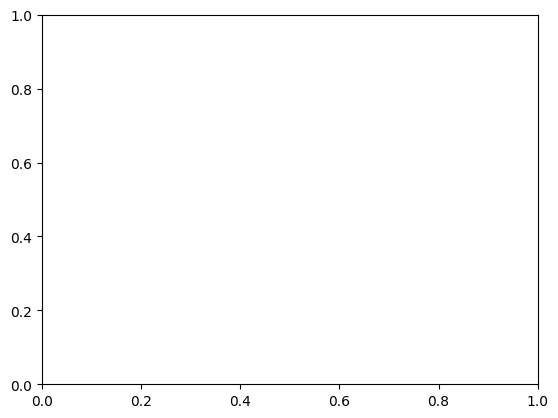

In [ ]:
n_iter = 1000

fig, ax = plt.subplots(1, 1)

n_maps = z.shape[0]

r2_scores = {f'map {i}': list() for i in range(n_maps)}
losses = list()

for i in tqdm(range(n_iter)):

    generated_maps = min_max_unnormalize(
        netG(z).squeeze(),
        k_min=0.10000000149011612,
        k_max=833.6722412109375
    ).transpose(1, 2)

    optimizer.zero_grad()

    loss = loss_fn(generated_maps).mean()
    loss.backward()
    optimizer.step()
    scheduler.step()

    losses.append(loss.item())

    # ax.clear()
    # for j in range(n_maps):
    #     r2_scores[f'map {j}'].append(loss_fn.r2()[j].item())
    #     # ax.plot(r2_scores[f'map {j}'])
    #     ax.plot(losses)

    # ax.legend()
    # ax.set_yscale('log')
    # clear_output(wait=True)
    # display(fig)

    # break


# Analyze sampled maps

In [ ]:
sampled_maps = np.load('maps.npy').astype(np.float32)
sampled_maps

array([[[4.10327271e+02, 3.96566132e+02, 3.88561859e+02, ...,
         3.56946449e+01, 1.53455307e+02, 2.36803604e+02],
        [3.46982391e+02, 3.74233215e+02, 3.52536163e+02, ...,
         3.68115449e+00, 2.21284180e+01, 7.01340714e+01],
        [3.85940018e+01, 9.49697037e+01, 2.95325470e+02, ...,
         1.69831961e-01, 2.42446274e-01, 8.58350277e+00],
        ...,
        [3.81614838e+02, 3.71060425e+02, 3.58647491e+02, ...,
         2.41844025e+02, 2.42744797e+02, 2.62909332e+02],
        [3.74477509e+02, 3.65244568e+02, 3.62132172e+02, ...,
         2.56561157e+02, 2.82376709e+02, 2.93754791e+02],
        [3.86953705e+02, 3.73258667e+02, 3.64316101e+02, ...,
         3.15799713e+02, 2.84987854e+02, 2.86071930e+02]],

       [[1.03776581e+02, 8.05162277e+01, 7.79953461e+01, ...,
         3.68172760e+02, 3.73415680e+02, 3.88945496e+02],
        [7.44671783e+01, 5.63941689e+01, 5.49449883e+01, ...,
         3.65667145e+02, 3.47007935e+02, 3.86100220e+02],
        [4.18390388e+01, 

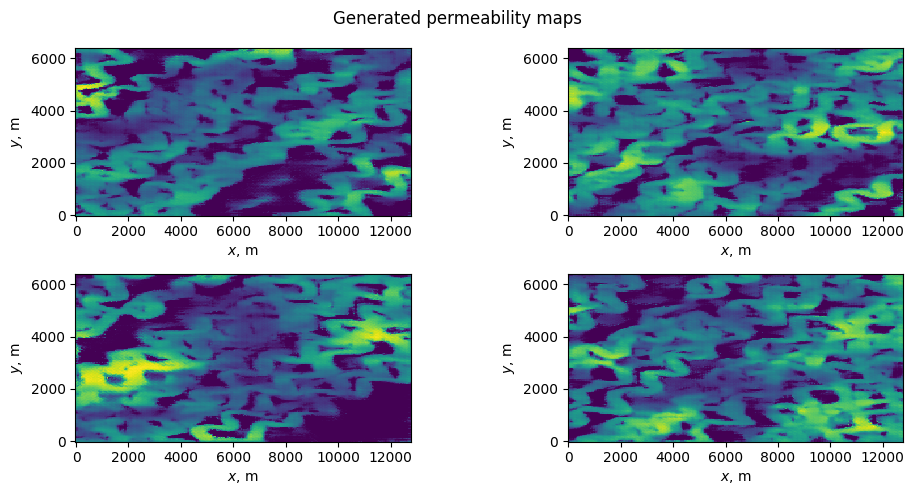

In [ ]:
X = np.arange(256) * 50
Y = np.arange(256) * 25

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

fig.suptitle('Generated permeability maps')
for i, ax in enumerate(axs.flatten()):
    ax.pcolormesh(X, Y, sampled_maps[i])

    ax.set_aspect('equal')

    ax.set_xlabel(r'$x$, m')
    ax.set_ylabel(r'$y$, m')

fig.tight_layout()
fig.show()

In [ ]:
loss_fn(
    torch.from_numpy(sampled_maps).to(DEVICE)
)

tensor([ 681.8870,  351.2665,  982.7357,  818.4910,  427.1550,  821.3460,
         765.2349,  977.4006,  990.2197,  340.2362,  843.9759, 3028.0798,
        1232.3200,  768.7424], device='cuda:0', dtype=torch.float64,
       grad_fn=<MeanBackward1>)

In [ ]:
loss_fn.y_pred.shape

torch.Size([14, 25])

In [ ]:
def draw_crossplot(real, pred, ax, xmin=None, xmax=None, **kwargs):
    if xmin is None:
        xmin = np.min([np.nanmin(real), np.nanmin(pred)])
    if xmax is None:
        xmax = np.max([np.nanmax(real), np.nanmax(pred)])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    ax.plot((xmin, xmax), (xmin, xmax), 'k--', alpha=0.5, zorder=2)
    sc = ax.scatter(real, pred, **kwargs)
    ax.set_aspect('equal')
    return sc

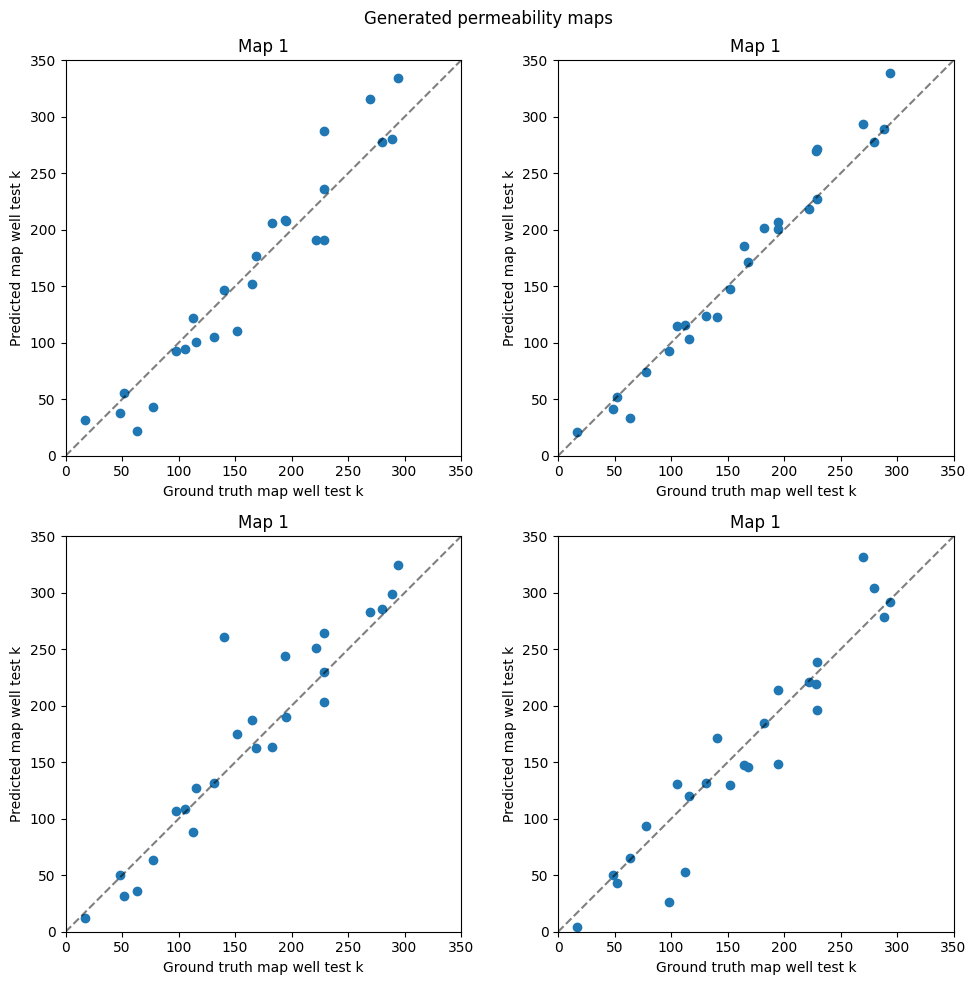

In [ ]:
X = np.arange(256) * 50
Y = np.arange(256) * 25

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle('Generated permeability maps')
for i, ax in enumerate(axs.flatten()):
    ax.set_title('Map 1')
    draw_crossplot(
        loss_fn.y_gt.detach().cpu().numpy(),
        loss_fn.y_pred[i].detach().cpu().numpy(),
        ax,
        xmin=0,
        xmax=350
    )
    ax.set_xlabel('Ground truth map well test k')
    ax.set_ylabel('Predicted map well test k')
fig.tight_layout()
fig.show()

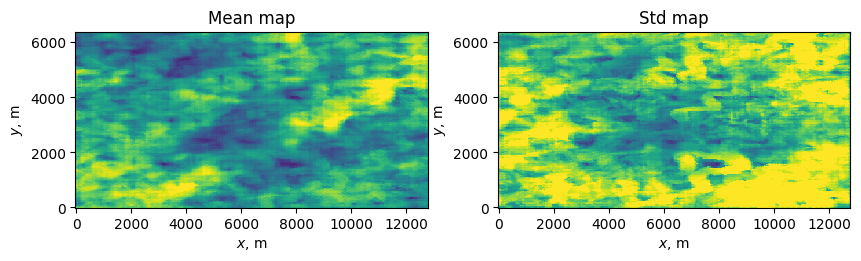

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Mean map')
ax1.pcolormesh(X, Y, np.mean(sampled_maps, axis=0), vmin=0, vmax=400)

ax2.set_title('Std map')
ax2.pcolormesh(X, Y, np.std(sampled_maps, axis=0), vmin=0, vmax=200)

for ax in (ax1, ax2):
    ax.set_aspect('equal')

    ax.set_xlabel(r'$x$, m')
    ax.set_ylabel(r'$y$, m')